# Modul 4 Persamaan Diferensial Numerik: Metode Multistep

Kembali ke [Persamaan Diferensial Numerik](./pdnum2024genap.qmd)

Metode-metode sebelumnya, seperi metode Euler, Runge-Kutta, dan kawan-kawannya adalah metode jenis one-step, karena di tiap iterasinya kita hanya menggunakan informasi dari satu nilai $t_{i}$. Berikut kita akan mulai membahas mengenai metode multistep, di mana kita menggunakan lebih dari satu nilai $t_{i}$ untuk membuat aproksimasi.

Terdapat dua jenis metode multistep, yaitu:

- Multistep eksplisit, di mana kita mengaproksimasi nilai pada $t_{i+1}$ menggunakan nilai $t$ sebelumnya.

- Multistep implisit, di mana kita mengaproksimasi nilai pada $t_{i+1}$ menggunakan nilai pada $t$ sebelumnya, sekaligus menggunakan nilai pada $t_{i+1}$ itu sendiri.

## Metode Multistep Eksplisit: Metode $n$-step Adams-Bashforth

Metode multistep eksplisit yang akan kita bahas adalah **metode $n$-step Adams-Bashforth.**

Metode $n$-step Adams-Bashforth menggunakan $n$ titik sebelumnya untuk mengaproksimasi nilai. Karena metode ini adalah metode multistep, maka $n$ nilai awalnya pun harus diperoleh terlebih dahulu. Misal kita ingin menggunakan metode three-step Adams-Bashforth, maka $w_{1}, w_{2}$, dan $w_{3}$ harus ada terlebih dahulu sebelum dilanjutkan ke metode Adams-Bashforth. Nilai-nilai awal tersebut dapat diperoleh dari metode-metode one-step sebelumnya, seperti metode Runge-Kutta (biasanya digunakan metode Runge-Kutta orde 4).

Bentuk umum rumus untuk metode $n$-step Adams-Bashforth bisa ditulis sebagai berikut.

$$w_{i+1} = w_i + \frac{h}{\text{pembagi}} \left[ c_0 f\left(t_i,w_i\right) + c_{-1} f\left(t_{i-1},w_{i-1}\right) + \dots + c_{-n+1} f\left(t_{i-n+1},w_{i-n+1}\right) \right]$$

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} & c_{-4} \\
    1 & \hspace{0.5cm} & 1 &&&& \\
    2 & \hspace{0.5cm} & 3 & -1 &&& \\
    12 & \hspace{0.5cm} & 23 & -16 & 5 && \\
    24 & \hspace{0.5cm} & 55 & -59 & 37 & -9 & \\
    720 & \hspace{0.5cm} & 1901 & -2774 & 2616 & -1274 & 251
\end{array}

* Orde: banyaknya koefisien taknol yang mengkali $f$
* $n$-step, $n$: banyaknya koefisien taknol yang mengkali $f$, kecuali koefisien yang mengkali $f\left(t_{i+1},w_{i+1}\right)$ kalau ada

Untuk metode Adams-Bashforth, tidak muncul suku $f\left(t_{i+1},w_{i+1}\right)$, yaitu tidak ada koefisien yang mengkali $f\left(t_{i+1},w_{i+1}\right)$ (atau bisa dibilang ada tapi nilainya nol). Sehingga, ukuran orde menjadi sama persis dengan step. 

Catatan: one-step Adams-Bashforth ialah metode Euler, sehingga tidak dibahas.

### Two-step Adams-Bashforth (orde 2)

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} & c_{-4} \\
    1 & \hspace{0.5cm} & 1 &&&& \\
    \textcolor{red}{2} & \hspace{0.5cm} & \textcolor{red}{3} & \textcolor{red}{-1} &&& \\
    12 & \hspace{0.5cm} & 23 & -16 & 5 && \\
    24 & \hspace{0.5cm} & 55 & -59 & 37 & -9 & \\
    720 & \hspace{0.5cm} & 1901 & -2774 & 2616 & -1274 & 251
\end{array}

$$
\begin{gathered}
w_{0}=\alpha, \quad w_{1}=\alpha_{1}, \\
w_{i+1}=w_{i}+\frac{h}{2}\left[3 f\left(t_{i}, w_{i}\right)-f\left(t_{i-1}, w_{i-1}\right)\right]
\end{gathered}
$$

Bisa ditulis:

$$
\begin{gathered}
w_{1}=\alpha, \\
w_{2}=\alpha_1 \hspace{0.2cm} \text{(hitung dengan metode Runge-Kutta orde 4)}, \\
m_1 = f\left(t_{i}, w_{i}\right) \\
m_2 = f\left(t_{i-1}, w_{i-1}\right) \\
w_{i+1}=w_{i}+\frac{h}{2}\left[3 m_1-m_2\right]
\end{gathered}
$$

In [1]:
function [t, w] = adams_bashforth_orde2(f, a, b, N, alpha)
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  
  % Hitung w(2) menggunakan metode Runge-Kutta orde 4
  i = 1;
  t(i + 1) = t(i) + h;
  k1 = h * f(t(i), w(i));
  k2 = h * f(t(i) + (h/2), w(i) + (k1/2));
  k3 = h * f(t(i) + (h/2), w(i) + (k2/2));
  k4 = h * f(t(i + 1), w(i) + k3);
  w(i+1) = w(i) + (k1 + 2*k2 + 2*k3 + k4) / 6;
  
  % Algoritma utama Adams-Bashforth orde 2
  for i = 2 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i-1), w(i-1));
    w(i+1) = w(i) + (h/2) * (3*m1 - m2);
  endfor
endfunction

Misalkan diberikan MNA sebagai berikut, yang ingin diselesaikan secara numerik dengan $N = 10$:

$$y' = y - t^2 + 1$$
$$0 \le t \le 2$$
$$y(0) = 0.5$$

yang kebetulan memiliki solusi eksak:

$$y\left(t\right) = \left( t + 1 \right)^2 - 0.5 e^t$$

Contoh penggunaan:

Tabel aproksimasi w, solusi eksak y, dan error:
ans =

        0   0.5000   0.5000        0
   0.2000   0.8293   0.8293   0.0000
   0.4000   1.2161   1.2141   0.0020
   0.6000   1.6540   1.6489   0.0050
   0.8000   2.1366   2.1272   0.0093
   1.0000   2.6561   2.6409   0.0153
   1.2000   3.2033   3.1799   0.0234
   1.4000   3.7667   3.7324   0.0343
   1.6000   4.3324   4.2835   0.0489
   1.8000   4.8834   4.8152   0.0682
   2.0000   5.3992   5.3055   0.0937

Error total (norm L1):
0.3002


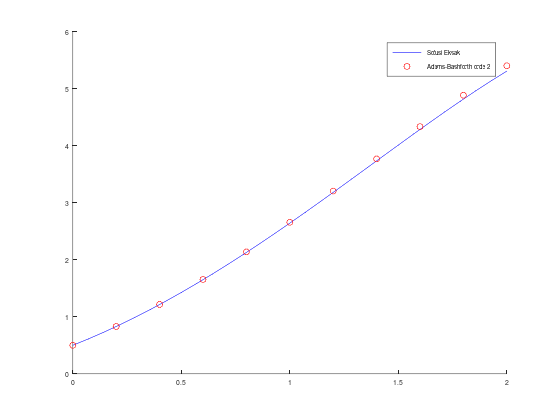

In [2]:
f = @(t, y) y - t .^ 2 + 1;
a = 0;
b = 2;
N = 10;
alpha = 0.5;

[t, w] = adams_bashforth_orde2(f, a, b, N, alpha);

sln = @(t) (t + 1) .^ 2 - 0.5 * exp(t);
y_eksak = sln(t);

err_ab2 = abs(y_eksak - w);
err_ab2_total = sum(err_ab2); % norm L1 (taxicab/Manhattan)

disp("Tabel aproksimasi w, solusi eksak y, dan error:");
[t, w, y_eksak, err_ab2]
disp("Error total (norm L1):");
disp(err_ab2_total);

hold on;
fplot(sln, [a, b], 'b');
scatter(t, w, 'r');
legend("Solusi Eksak", "Adams-Bashforth orde 2")

### Three-step Adams-Bashforth (orde 3)

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} & c_{-4} \\
    1 & \hspace{0.5cm} & 1 &&&& \\
    2 & \hspace{0.5cm} & 3 & -1 &&& \\
    \textcolor{red}{12} & \hspace{0.5cm} & \textcolor{red}{23} & \textcolor{red}{-16} & \textcolor{red}{5} && \\
    24 & \hspace{0.5cm} & 55 & -59 & 37 & -9 & \\
    720 & \hspace{0.5cm} & 1901 & -2774 & 2616 & -1274 & 251
\end{array}

$$
\begin{gathered}
w_{0}=\alpha, \quad w_{1}=\alpha_{1}, \quad w_{2}=\alpha_{2}, \\
w_{i+1}=w_{i}+\frac{h}{12}\left[23 f\left(t_{i}, w_{i}\right)-16 f\left(t_{i-1}, w_{i-1}\right)+5 f\left(t_{i-2}, w_{i-2}\right)\right]
\end{gathered}
$$

Bisa ditulis:

$$
\begin{gathered}
w_{1}=\alpha, \\
w_{2}=\alpha_{1}, \quad w_{3}=\alpha_{2}, \\
m_1 = f\left(t_{i}, w_{i}\right) \\
m_2 = f\left(t_{i-1}, w_{i-1}\right) \\
m_3 = f\left(t_{i-2}, w_{i-2}\right) \\
w_{i+1}=w_{i}+\frac{h}{12}\left[23 m_1-16 m_2+5 m_3\right]
\end{gathered}
$$

In [8]:
function [t, w] = adams_bashforth_orde3(f, a, b, N, alpha)
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  
  % Hitung w(2), w(3) menggunakan metode Runge-Kutta orde 4
  for i = 1 : 2
      t(i + 1) = t(i) + h;
      k1 = h * f(t(i), w(i));
      k2 = h * f(t(i) + (h/2), w(i) + (k1/2));
      k3 = h * f(t(i) + (h/2), w(i) + (k2/2));
      k4 = h * f(t(i + 1), w(i) + k3);
      w(i+1) = w(i) + (k1 + 2*k2 + 2*k3 + k4) / 6;
  endfor
  
  % Algoritma utama Adams-Bashforth orde 3
  for i = 3 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i-1), w(i-1));
    m3 = f(t(i-2), w(i-2));
    w(i+1) = w(i) + (h/12) * (23*m1 - 16*m2 + 5*m3);
  endfor
endfunction

### Four-step Adams-Bashforth (orde 4)

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} & c_{-4} \\
    1 & \hspace{0.5cm} & 1 &&&& \\
    2 & \hspace{0.5cm} & 3 & -1 &&& \\
    12 & \hspace{0.5cm} & 23 & -16 & 5 && \\
    \textcolor{red}{24} & \hspace{0.5cm} & \textcolor{red}{55} & \textcolor{red}{-59} & \textcolor{red}{37} & \textcolor{red}{-9} & \\
    720 & \hspace{0.5cm} & 1901 & -2774 & 2616 & -1274 & 251
\end{array}

$$
\begin{gathered}
w_{0}=\alpha, \quad w_{1}=\alpha_{1}, \quad w_{2}=\alpha_{2}, \quad w_{3}=\alpha_{3} \\
w_{i+1}=w_{i}+\frac{h}{24}\left[55 f\left(t_{i}, w_{i}\right)-59 f\left(t_{i-1}, w_{i-1}\right)+37 f\left(t_{i-2}, w_{i-2}\right)-9 f\left(t_{i-3}, w_{i-3}\right)\right]
\end{gathered}
$$

Bisa ditulis:

$$
\begin{gathered}
w_{1}=\alpha, \\
w_{2}=\alpha_{1}, \quad w_{3}=\alpha_{2}, \quad w_{4}=\alpha_{3} \\
m_1 = f\left(t_{i}, w_{i}\right) \\
m_2 = f\left(t_{i-1}, w_{i-1}\right) \\
m_3 = f\left(t_{i-2}, w_{i-2}\right) \\
m_4 = f\left(t_{i-3}, w_{i-3}\right) \\
w_{i+1}=w_{i}+\frac{h}{24}\left[55 m_1-59 m_2+37 m_3-9 m_4\right]
\end{gathered}
$$

In [9]:
function [t, w] = adams_bashforth_orde4(f, a, b, N, alpha)
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  
  % Hitung w(2), w(3), w(4) menggunakan metode Runge-Kutta orde 4
  for i = 1 : 3
      t(i + 1) = t(i) + h;
      k1 = h * f(t(i), w(i));
      k2 = h * f(t(i) + (h/2), w(i) + (k1/2));
      k3 = h * f(t(i) + (h/2), w(i) + (k2/2));
      k4 = h * f(t(i + 1), w(i) + k3);
      w(i+1) = w(i) + (k1 + 2*k2 + 2*k3 + k4) / 6;
  endfor
  
  % Algoritma utama Adams-Bashforth orde 4
  for i = 4 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i-1), w(i-1));
    m3 = f(t(i-2), w(i-2));
    m4 = f(t(i-3), w(i-3));
    w(i+1) = w(i) + (h/24) * (55*m1 - 59*m2 + 37*m3 - 9*m4);
  endfor
endfunction

### Five-step Adams-Bashforth (orde 5)

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} & c_{-4} \\
    1 & \hspace{0.5cm} & 1 &&&& \\
    2 & \hspace{0.5cm} & 3 & -1 &&& \\
    12 & \hspace{0.5cm} & 23 & -16 & 5 && \\
    24 & \hspace{0.5cm} & 55 & -59 & 37 & -9 & \\
    \textcolor{red}{720} & \hspace{0.5cm} & \textcolor{red}{1901} & \textcolor{red}{-2774} & \textcolor{red}{2616} & \textcolor{red}{-1274} & \textcolor{red}{251}
\end{array}

$$
\begin{gathered}
w_{0}=\alpha, \quad w_{1}=\alpha_{1}, \quad w_{2}=\alpha_{2}, \quad w_{3}=\alpha_{3}, \quad w_{4}=\alpha_{4}, \\
w_{i+1}=w_{i}+\frac{h}{720}\left[1901 f\left(t_{i}, w_{i}\right)-2774 f\left(t_{i-1}, w_{i-1}\right)+2616 f\left(t_{i-2}, w_{i-2}\right)\right. \\
\left.-1274 f\left(t_{i-3}, w_{i-3}\right)+251 f\left(t_{i-4}, w_{i-4}\right)\right]
\end{gathered}
$$

Bisa ditulis:

$$
\begin{gathered}
w_{1}=\alpha, \\
w_{2}=\alpha_{1}, \quad w_{3}=\alpha_{2}, \quad w_{4}=\alpha_{3}, \quad w_{5}=\alpha_{4}, \\
m_1 = f\left(t_{i}, w_{i}\right) \\
m_2 = f\left(t_{i-1}, w_{i-1}\right) \\
m_3 = f\left(t_{i-2}, w_{i-2}\right) \\
m_4 = f\left(t_{i-3}, w_{i-3}\right) \\
m_5 = f\left(t_{i-4}, w_{i-4}\right) \\
w_{i+1}=w_{i}+\frac{h}{720}\left[1901 m_1-2774 m_2+2616 m_3\right. \\
\left.-1274 m_4+251 m_5\right]
\end{gathered}
$$

In [10]:
function [t, w] = adams_bashforth_orde5(f, a, b, N, alpha)
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  
  % Hitung w(2), ..., w(5) menggunakan metode Runge-Kutta orde 4
  for i = 1 : 4
      t(i + 1) = t(i) + h;
      k1 = h * f(t(i), w(i));
      k2 = h * f(t(i) + (h/2), w(i) + (k1/2));
      k3 = h * f(t(i) + (h/2), w(i) + (k2/2));
      k4 = h * f(t(i + 1), w(i) + k3);
      w(i+1) = w(i) + (k1 + 2*k2 + 2*k3 + k4) / 6;
  endfor
  
  % Algoritma utama Adams-Bashforth orde 5
  for i = 5 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i-1), w(i-1));
    m3 = f(t(i-2), w(i-2));
    m4 = f(t(i-3), w(i-3));
    m5 = f(t(i-4), w(i-4));
    w(i+1) = w(i) + (h/720) * (1901*m1 - 2774*m2 + 2616*m3 -1274*m4 +251*m5);
  endfor
endfunction

## Perbandingan Metode Adams-Bashforth

Misalkan diberikan MNA sebagai berikut, yang ingin diselesaikan secara numerik dengan $N = 10$:

$$y' = y - t^2 + 1$$
$$0 \le t \le 2$$
$$y(0) = 0.5$$

yang kebetulan memiliki solusi eksak:

$$y\left(t\right) = \left( t + 1 \right)^2 - 0.5 e^t$$

Kita bisa membandingkan orde-orde metode Adams-Bashforth dengan menyelesaikan MNA tersebut.

ans =

        0   0.5000   0.5000   0.5000   0.5000   0.5000
   0.2000   0.8293   0.8293   0.8293   0.8293   0.8293
   0.4000   1.2141   1.2161   1.2141   1.2141   1.2141
   0.6000   1.6489   1.6540   1.6493   1.6489   1.6489
   0.8000   2.1272   2.1366   2.1283   2.1273   2.1272
   1.0000   2.6409   2.6561   2.6428   2.6411   2.6408
   1.2000   3.1799   3.2033   3.1831   3.1803   3.1799
   1.4000   3.7324   3.7667   3.7372   3.7330   3.7324
   1.6000   4.2835   4.3324   4.2905   4.2844   4.2836
   1.8000   4.8152   4.8834   4.8253   4.8166   4.8153
   2.0000   5.3055   5.3992   5.3196   5.3075   5.3057



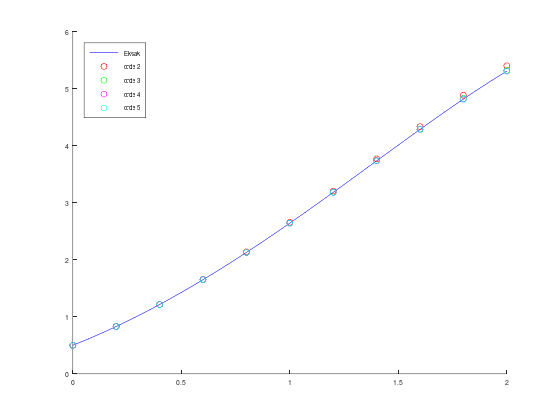

In [12]:
f = @(t, y) y - t .^ 2 + 1;
a = 0;
b = 2;
alpha = 0.5;
N = 10;

[t_orde2, w_orde2] = adams_bashforth_orde2(f, a, b, N, alpha);
[t_orde3, w_orde3] = adams_bashforth_orde3(f, a, b, N, alpha);
[t_orde4, w_orde4] = adams_bashforth_orde4(f, a, b, N, alpha);
[t_orde5, w_orde5] = adams_bashforth_orde5(f, a, b, N, alpha);

sln = @(t) (t + 1) .^ 2 - 0.5 * exp(t);
y_eksak = sln(t);

[t, y_eksak, w_orde2, w_orde3, w_orde4, w_orde5]

hold on;
fplot(sln, [a, b], 'b');
scatter(t_orde2, w_orde2, 'r');
scatter(t_orde3, w_orde3, 'g');
scatter(t_orde4, w_orde4, 'm');
scatter(t_orde5, w_orde5, 'c');
legend("Eksak", "orde 2", "orde 3", "orde 4", "orde 5")
legend('location', 'northwest') % agar kotak keterangan di atas kiri

## (penjelasan tanpa kode) Metode Multistep Implisit: Metode Adams-Moulton

Metode implisit lebih sulit digunakan daripada metode eksplisit. Metode implisit dengan sendirinya tidak bisa langsung digunakan, sehingga tidak bisa langsung dimasukkan ke dalam program.

Biasanya, apabila suatu MNA PDB orde 1 (dengan fungsi $f\left(t,y\right)$ yang diketahui) ingin diselesaikan denegan metode implisit, maka rumus metode implisit harus dimanipulasi aljabar terlebih dahulu, hingga diperoleh bentuk $w_{i+1} = \dots$ **tanpa ada suku $w_{i+1}$ sama sekali di ruas kanan.**

Hasil manipulasi aljabar bisa berbeda-beda untuk fungsi $f\left(t,y\right)$ yang berbeda. Sehingga, apabila metode Adams-Moulton ingin dibuat programnya, maka kode programnya akan sedikit berbeda (yaitu berbeda di hasil manipulasi aljabar) untuk tiap MNA, dan hasil manipulasi aljabar harus dibuat kodenya secara manual untuk tiap MNA.

Oleh karena itu, metode Adams-Moulton itu sendiri sangat tidak praktis apabila ingin dibuat programnya.

Namun, ada metode Adams yang tetap memanfaatkan metode Adams-Moulton tetapi cenderung lebih baik daripada metode Adams-Bashforth, yaitu metode predictor-corrector yang akan dibahas selanjutnya. Karena itulah, metode Adams-Moulton masih dipaparkan di sini.

Bentuk umum rumus untuk metode $n$-step Adams-Moulton bisa ditulis sebagai berikut.

$$w_{i+1} = w_i + \frac{h}{\text{pembagi}} \left[ c_1 f\left(t_{i+1},w_{i+1}\right) + c_0 f\left(t_i,w_i\right) + \dots + c_{-n+1} f\left(t_{i-n+1},w_{i-n+1}\right) \right]$$

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} \\
    1 & 1 &&&&& \\
    2 & 1 & 1 &&&& \\
    12 & 5 & 8 & -1 &&& \\
    24 & 9 & 19 & -5 & 1 && \\
    720 & 251 & 646 & -264 & 106 & -19
\end{array}

* Orde: banyaknya koefisien taknol yang mengkali $f$
* $n$-step, $n$: banyaknya koefisien taknol yang mengkali $f$, kecuali koefisien yang mengkali $f\left(t_{i+1},w_{i+1}\right)$ kalau ada

Untuk metode Adams-Moulton, berlaku: orde = $n+1$.

Kedua ini tidak dibahas:

* metode Adams-Moulton orde 1, yaitu metode backward Euler.
* metode Adams-Moulton orde 2, yaitu metode trapezoidal (integrasi numerik).

### Two-step Adams-Moulton (orde 3)

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} \\
    1 & 1 &&&&& \\
    2 & 1 & 1 &&&& \\
    \textcolor{red}{12} & \textcolor{red}{5} & \textcolor{red}{8} & \textcolor{red}{-1} &&& \\
    24 & 9 & 19 & -5 & 1 && \\
    720 & 251 & 646 & -264 & 106 & -19
\end{array}

$$
\begin{aligned}
w_0 & =\alpha, \quad w_1=\alpha_1, \\
w_{i+1} & =w_i+\frac{h}{12}\left[5 f\left(t_{i+1}, w_{i+1}\right)+8 f\left(t_i, w_i\right)-f\left(t_{i-1}, w_{i-1}\right)\right]
\end{aligned}
$$

Bisa ditulis:

$$
\begin{aligned}
w_0 &= \alpha, \\
w_1 &= \alpha_1, \\
m_0 &= f\left(t_{i+1}, w_{i+1}\right) \\
m_1 &= f\left(t_i, w_i\right) \\
m_2 &= f\left(t_{i-1}, w_{i-1}\right) \\
w_{i+1} &=w_i+\frac{h}{12}\left[5 m_0+8 m_1-m_2\right]
\end{aligned}
$$

### Three-step Adams-Moulton (orde 4)

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} \\
    1 & 1 &&&&& \\
    2 & 1 & 1 &&&& \\
    12 & 5 & 8 & -1 &&& \\
    \textcolor{red}{24} & \textcolor{red}{9} & \textcolor{red}{19} & \textcolor{red}{-5} & \textcolor{red}{1} && \\
    720 & 251 & 646 & -264 & 106 & -19
\end{array}

$$
\begin{aligned}
w_0 & =\alpha, \quad w_1=\alpha_1, \quad w_2=\alpha_2, \\
w_{i+1} & =w_i+\frac{h}{24}\left[9 f\left(t_{i+1}, w_{i+1}\right)+19 f\left(t_i, w_i\right)-5 f\left(t_{i-1}, w_{i-1}\right)+f\left(t_{i-2}, w_{i-2}\right)\right]
\end{aligned}
$$

Bisa ditulis:

$$
\begin{aligned}
w_0 &= \alpha, \\
w_1 &= \alpha_1, \quad w_2=\alpha_2, \\
m_0 &= f\left(t_{i+1}, w_{i+1}\right) \\
m_1 &= f\left(t_i, w_i\right) \\
m_2 &= f\left(t_{i-1}, w_{i-1}\right) \\
m_3 &= f\left(t_{i-2}, w_{i-2}\right) \\
w_{i+1} &= w_i+\frac{h}{24}\left[9 m_0+19 m_1-5 m_2+m_3\right]
\end{aligned}
$$

### Four-step Adams-Moulton (orde 5)

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} \\
    1 & 1 &&&&& \\
    2 & 1 & 1 &&&& \\
    12 & 5 & 8 & -1 &&& \\
    24 & 9 & 19 & -5 & 1 && \\
    \textcolor{red}{720} & \textcolor{red}{251} & \textcolor{red}{646} & \textcolor{red}{-264} & \textcolor{red}{106} & \textcolor{red}{-19}
\end{array}

$$
\begin{aligned}
w_0= & \alpha, \quad w_1=\alpha_1, \quad w_2=\alpha_2, \quad w_3=\alpha_3, \\
w_{i+1}= & w_i+\frac{h}{720}\left[251 f\left(t_{i+1}, w_{i+1}\right)+646 f\left(t_i, w_i\right)\right. \\
& \left.-264 f\left(t_{i-1}, w_{i-1}\right)+106 f\left(t_{i-2}, w_{i-2}\right)-19 f\left(t_{i-3}, w_{i-3}\right)\right]
\end{aligned}
$$

Bisa ditulis:

$$
\begin{aligned}
w_0 &= \alpha, \\
w_1 &= \alpha_1, \quad w_2=\alpha_2, \quad w_3=\alpha_3, \\
m_0 &= f\left(t_{i+1}, w_{i+1}\right) \\
m_1 &= f\left(t_i, w_i\right) \\
m_2 &= f\left(t_{i-1}, w_{i-1}\right) \\
m_3 &= f\left(t_{i-2}, w_{i-2}\right) \\
m_4 &= f\left(t_{i-3}, w_{i-3}\right) \\
w_{i+1} &= w_i+\frac{h}{720}\left[251 m_0+646 m_1\right. \\
& \left.-264 m_2+106 m_3-19 m_4\right]
\end{aligned}
$$

## Metode Adams *Predictor-Corrector* orde $n$

Metode implisit tidak praktis digunakan dengan sendirinya. Namun, metode implisit pada umumnya lebih akurat daripada metode eksplisit dengan orde yang sama.

Rumus metode implisit seolah-olah merupakan persamaan yang harus dipenuhi oleh $w_{i+1}$ (yang muncul di ruas kiri serta ruas kanan).

Sehingga, kita bisa saja mencoba memodifikasi metode multistep eksplisit: di tiap iterasi, setelah menghitung nilai $w_{i+1}$ menggunakan metode Adams-Bashforth orde $n$, kita bisa memasukkan nilai $w_{i+1}$ tersebut ke dalam ruas kanan rumus metode Adams-Moulton orde $n$ untuk memperoleh aproksimasi $w_{i+1}$ yang lebih baik (toh metode Adams-Moulton orde $n$ umumnya lebih akurat daripada metode Adams-Bashforth orde $n$).

Ide ini disebut **metode Adams *predictor-corrector* orde $n$:** metode Adams-Bashforth orde $n$ memprediksi (menghitung, mengaproksimasi) nilai $w_{i+1}$ yang kemudian dikoreksi (diperbaiiki) oleh metode Adams-Moulton orde $n$ (yang lebih akurat).

Secara kode program, modifikasi ini hanya menambahkan satu/dua baris saja ke program metode Adams-Bashforth orde $n$, yaitu rumus metode Adams-Moulton orde $n$ di dalam *for loop* yang sama.

Note: antara metode Adams-Bashforth dan metode Adams-Moulton, ordenya sama = pembaginya sama.

### Metode Adams *predictor-corrector* orde 3

Metode Adams-Bashforth orde 3 (three-step) diikuti metode Adams-Moulton orde 3 (two-step).

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} & c_{-4} \\
    1 & \hspace{0.5cm} & 1 &&&& \\
    2 & \hspace{0.5cm} & 3 & -1 &&& \\
    \textcolor{red}{12} & \hspace{0.5cm} & \textcolor{red}{23} & \textcolor{red}{-16} & \textcolor{red}{5} && \\
    24 & \hspace{0.5cm} & 55 & -59 & 37 & -9 & \\
    720 & \hspace{0.5cm} & 1901 & -2774 & 2616 & -1274 & 251
\end{array}

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} \\
    1 & 1 &&&&& \\
    2 & 1 & 1 &&&& \\
    \textcolor{red}{12} & \textcolor{red}{5} & \textcolor{red}{8} & \textcolor{red}{-1} &&& \\
    24 & 9 & 19 & -5 & 1 && \\
    720 & 251 & 646 & -264 & 106 & -19
\end{array}

Bisa ditulis:

$$
\begin{aligned}
w_{1}&=\alpha, \\
w_{2}&=\alpha_{1}, \quad w_{3}=\alpha_{2}, \\
m_1 &= f\left(t_{i}, w_{i}\right) \\
m_2 &= f\left(t_{i-1}, w_{i-1}\right) \\
m_3 &= f\left(t_{i-2}, w_{i-2}\right) \\
w_{i+1}&=w_{i}+\frac{h}{12}\left[23 m_1-16 m_2+5 m_3\right] \\
m_0 &= f\left(t_{i+1}, w_{i+1}\right) \\
w_{i+1} &=w_i+\frac{h}{12}\left[5 m_0+8 m_1-m_2\right]
\end{aligned}
$$

In [3]:
function [t, w] = adams_pc_orde3(f, a, b, N, alpha)
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  
  % Hitung w(2), w(3) menggunakan metode Runge-Kutta orde 4
  for i = 1 : 2
      t(i + 1) = t(i) + h;
      k1 = h * f(t(i), w(i));
      k2 = h * f(t(i) + (h/2), w(i) + (k1/2));
      k3 = h * f(t(i) + (h/2), w(i) + (k2/2));
      k4 = h * f(t(i + 1), w(i) + k3);
      w(i+1) = w(i) + (k1 + 2*k2 + 2*k3 + k4) / 6;
  endfor
  
  % Algoritma utama Adams Predictor-Corrector orde 3
  for i = 3 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i-1), w(i-1));
    m3 = f(t(i-2), w(i-2));
    % Adams-Bashforth orde 3 (three-step)
    w(i+1) = w(i) + (h/12) * (23*m1 - 16*m2 + 5*m3);
    % Adams-Moulton orde 3 (two-step)
    m0 = f(t(i+1), w(i+1));
    w(i+1) = w(i) + (h/12) * (5*m0 + 8*m1 - m2);
  endfor
endfunction

Misalkan diberikan MNA sebagai berikut, yang ingin diselesaikan secara numerik dengan $N = 10$:

$$y' = y - t^2 + 1$$
$$0 \le t \le 2$$
$$y(0) = 0.5$$

yang kebetulan memiliki solusi eksak:

$$y\left(t\right) = \left( t + 1 \right)^2 - 0.5 e^t$$

Tabel aproksimasi w, solusi eksak y, dan error:
ans =

        0   0.5000   0.5000        0
   0.2000   0.8293   0.8293   0.0000
   0.4000   1.2141   1.2141   0.0000
   0.6000   1.6489   1.6489   0.0000
   0.8000   2.1272   2.1272   0.0001
   1.0000   2.6408   2.6409   0.0001
   1.2000   3.1798   3.1799   0.0002
   1.4000   3.7322   3.7324   0.0002
   1.6000   4.2832   4.2835   0.0003
   1.8000   4.8147   4.8152   0.0005
   2.0000   5.3048   5.3055   0.0006

Error total (norm L1):
2.0431e-03


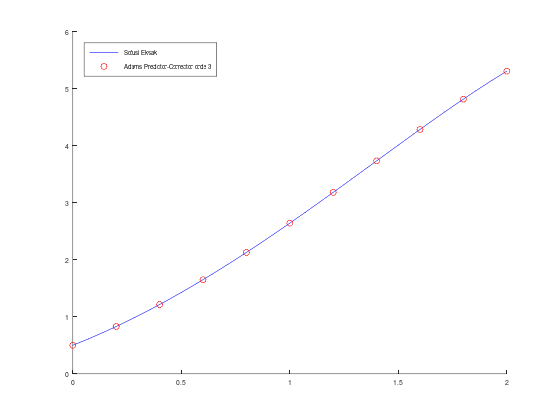

In [4]:
f = @(t, y) y - t .^ 2 + 1;
a = 0;
b = 2;
alpha = 0.5;
N = 10;

[t, w] = adams_pc_orde3(f, a, b, N, alpha);

sln = @(t) (t + 1) .^ 2 - 0.5 * exp(t);
y_eksak = sln(t);

err_pc3 = abs(y_eksak - w);
err_pc3_total = sum(err_pc3); % norm L1 (taxicab/Manhattan)

disp("Tabel aproksimasi w, solusi eksak y, dan error:");
[t, w, y_eksak, err_pc3]
disp("Error total (norm L1):");
disp(err_pc3_total);

hold on;
fplot(sln, [a, b], 'b');
scatter(t, w, 'r');
legend("Solusi Eksak", "Adams Predictor-Corrector orde 3")
legend('location', 'northwest')

### Metode Adams *predictor-corrector* orde 4

Metode Adams-Bashforth orde 4 (four-step) diikuti metode Adams-Moulton orde 4 (three-step).

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} & c_{-4} \\
    1 & \hspace{0.5cm} & 1 &&&& \\
    2 & \hspace{0.5cm} & 3 & -1 &&& \\
    12 & \hspace{0.5cm} & 23 & -16 & 5 && \\
    \textcolor{red}{24} & \hspace{0.5cm} & \textcolor{red}{55} & \textcolor{red}{-59} & \textcolor{red}{37} & \textcolor{red}{-9} & \\
    720 & \hspace{0.5cm} & 1901 & -2774 & 2616 & -1274 & 251
\end{array}

\begin{array}{cc|ccccc}
    \text{pembagi} & c_1 & c_0 & c_{-1} & c_{-2} & c_{-3} \\
    1 & 1 &&&&& \\
    2 & 1 & 1 &&&& \\
    12 & 5 & 8 & -1 &&& \\
    \textcolor{red}{24} & \textcolor{red}{9} & \textcolor{red}{19} & \textcolor{red}{-5} & \textcolor{red}{1} && \\
    720 & 251 & 646 & -264 & 106 & -19
\end{array}

Bisa ditulis:

$$
\begin{aligned}
w_{1}&=\alpha, \\
w_{2}&=\alpha_{1}, \quad w_{3}=\alpha_{2}, \quad w_{4}=\alpha_{3} \\
m_1 &= f\left(t_{i}, w_{i}\right) \\
m_2 &= f\left(t_{i-1}, w_{i-1}\right) \\
m_3 &= f\left(t_{i-2}, w_{i-2}\right) \\
m_4 &= f\left(t_{i-3}, w_{i-3}\right) \\
w_{i+1}&=w_{i}+\frac{h}{24}\left[55 m_1-59 m_2+37 m_3-9 m_4\right] \\
m_0 &= f\left(t_{i+1}, w_{i+1}\right) \\
w_{i+1} &= w_i+\frac{h}{24}\left[9 m_0+19 m_1-5 m_2+m_3\right]
\end{aligned}
$$

In [5]:
function [t, w] = adams_pc_orde4(f, a, b, N, alpha)
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  
  % Hitung w(2), w(3), w(4) menggunakan metode Runge-Kutta orde 4
  for i = 1 : 3
      t(i + 1) = t(i) + h;
      k1 = h * f(t(i), w(i));
      k2 = h * f(t(i) + (h/2), w(i) + (k1/2));
      k3 = h * f(t(i) + (h/2), w(i) + (k2/2));
      k4 = h * f(t(i + 1), w(i) + k3);
      w(i+1) = w(i) + (k1 + 2*k2 + 2*k3 + k4) / 6;
  endfor
  
  % Algoritma utama Adams Predictor-Corrector orde 4
  for i = 4 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i-1), w(i-1));
    m3 = f(t(i-2), w(i-2));
    m4 = f(t(i-3), w(i-3));
    % Adams-Bashforth orde 4 (four-step)
    w(i+1) = w(i) + (h/24) * (55*m1 - 59*m2 + 37*m3 - 9*m4);
    % Adams-Moulton orde 4 (three-step)
    m0 = f(t(i+1), w(i+1));
    w(i+1) = w(i) + (h/24) * (9*m0 + 19*m1 - 5*m2 + m3);
  endfor
endfunction

Misalkan diberikan MNA sebagai berikut, yang ingin diselesaikan secara numerik dengan $N = 10$:

$$y' = y - t^2 + 1$$
$$0 \le t \le 2$$
$$y(0) = 0.5$$

yang kebetulan memiliki solusi eksak:

$$y\left(t\right) = \left( t + 1 \right)^2 - 0.5 e^t$$

Kita bisa membandingkan orde-orde metode Adams Predictor-Corrector dengan menyelesaikan MNA tersebut.

ans =

        0   0.5000   0.5000        0   0.5000        0
   0.2000   0.8293   0.8293   0.0000   0.8293   0.0000
   0.4000   1.2141   1.2141   0.0000   1.2141   0.0000
   0.6000   1.6489   1.6489   0.0000   1.6489   0.0000
   0.8000   2.1272   2.1272   0.0001   2.1272   0.0000
   1.0000   2.6409   2.6408   0.0001   2.6408   0.0000
   1.2000   3.1799   3.1798   0.0002   3.1799   0.0000
   1.4000   3.7324   3.7322   0.0002   3.7324   0.0000
   1.6000   4.2835   4.2832   0.0003   4.2834   0.0001
   1.8000   4.8152   4.8147   0.0005   4.8151   0.0001
   2.0000   5.3055   5.3048   0.0006   5.3054   0.0001



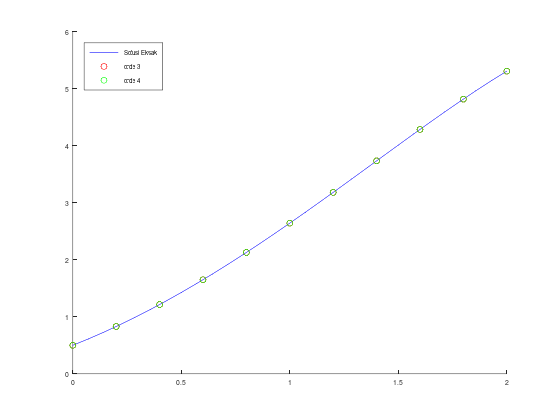

In [6]:
f = @(t, y) y - t .^ 2 + 1;
a = 0;
b = 2;
alpha = 0.5;
N = 10;

[t_pc3, w_pc3] = adams_pc_orde3(f, a, b, N, alpha);
[t_pc4, w_pc4] = adams_pc_orde4(f, a, b, N, alpha);

sln = @(t) (t + 1) .^ 2 - 0.5 * exp(t);
y_eksak = sln(t);

err_pc3 = abs(y_eksak - w_pc3);
err_pc4 = abs(y_eksak - w_pc4);

[t, y_eksak, w_pc3, err_pc3, w_pc4, err_pc4]

hold on;
fplot(sln, [a, b], 'b');
scatter(t_pc3, w_pc3, 'r');
scatter(t_pc4, w_pc4, 'g');
legend("Solusi Eksak", "orde 3", "orde 4")
legend('location', 'northwest')